# An overview and evaluation of how significantly each feature is correlated.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

I want to customize some fonts of these graphs...

In [2]:
import matplotlib
matplotlib.rcParams['font.sans-serif'] = "Cambria"

In [3]:
dataset = pd.read_csv("../dbs/data_2010s.csv")
dataset.columns

Index(['title', 'tmdb_id', 'year', 'budget', 'vote_count', 'vote_average',
       'runtime', 'popularity', 'view_count', 'like_count', 'dislike_count',
       'comment_count', 'film-noir', 'mystery', 'action', 'imax', 'sci-fi',
       'romance', 'musical', 'comedy', 'war', 'crime', 'children', 'fantasy',
       'horror', 'drama', 'western', 'adventure', 'animation', 'thriller',
       'revenue'],
      dtype='object')

## Let's plot the the revenue vs each of these features

In [4]:
revenue = dataset['revenue'].values

We will use the pearson r coefficient of correlation to evaluate how each feature affects the revenue

In [5]:
from scipy.stats import pearsonr

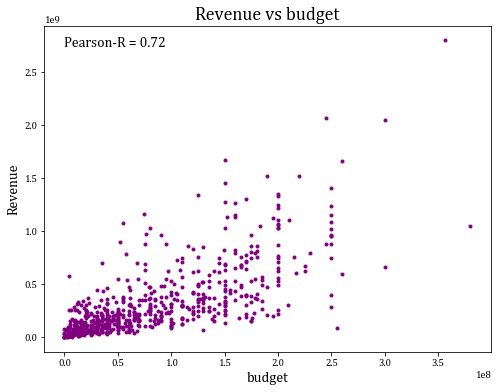

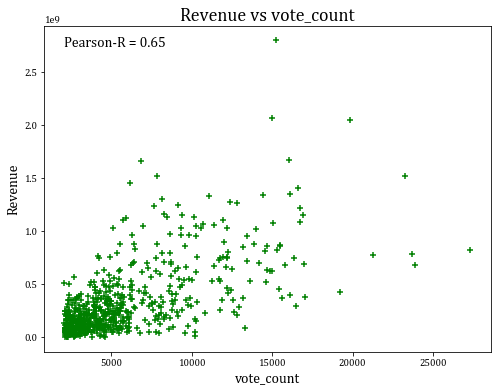

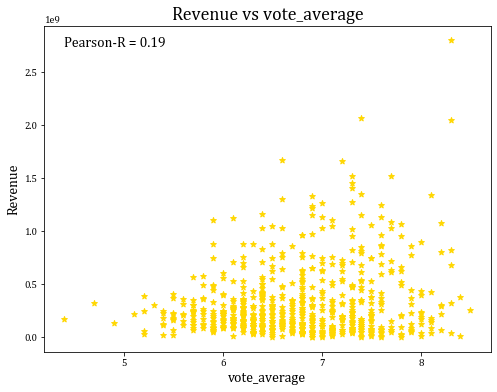

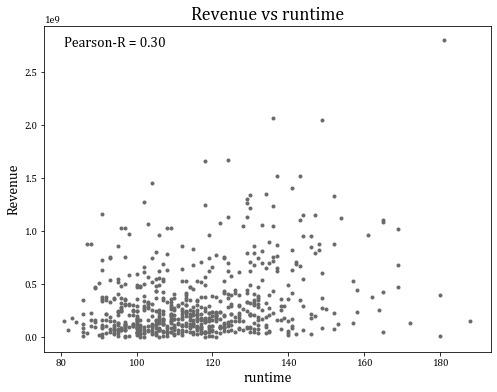

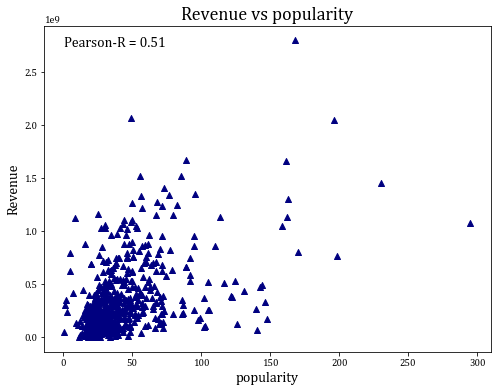

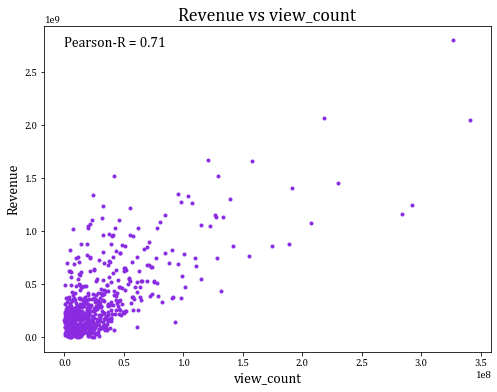

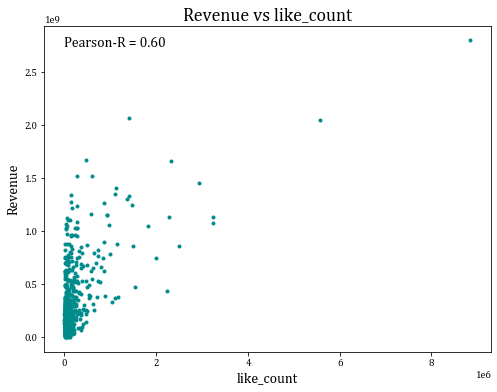

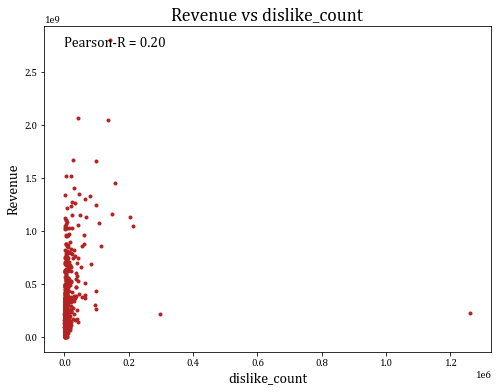

In [6]:
pointers_map = {
    'budget': [".", "purple"], 
    'vote_count': ["+", "green"], 
    'vote_average': ["*", "gold"],
    'runtime': [".", "dimgray"],
    'popularity': ["^", "navy"], 
    'view_count': [".", "blueviolet"], 
    'like_count': [".", "darkcyan"], 
    'dislike_count': [".", "firebrick"],
    'comment_count': [".", "peru"]
}
for x in dataset.columns.tolist()[3:11]:
    feature = dataset[x].values
    correlation, _ = pearsonr(feature, revenue) 
    plt.figure(figsize=(8, 6))
    plt.scatter(feature, revenue, marker=pointers_map[x][0], color=pointers_map[x][1]) #, edgecolor="black", edgewidth=1)
    plt.title(f"Revenue vs {x}", fontsize=18)
    plt.xlabel(f"{x}", fontsize=14)
    plt.ylabel("Revenue", fontsize=14)
    plt.annotate(f"Pearson-R = {correlation:.2f}", (np.min(feature), 0.98*np.max(revenue)), fontsize=14)
    plt.savefig(f"../figures/correlations/{x}-vs-revenue.jpg", dpi=200)

## Non-Numerical Values

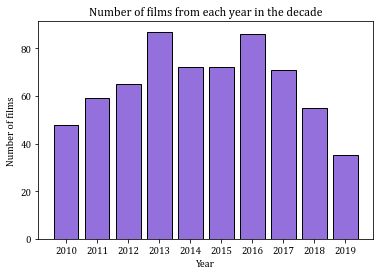

In [7]:
years_count = dataset['year'].value_counts().sort_index()
years = labels = np.array(years_count.index.tolist())
count_by_year = np.array(years_count.values.tolist())
plt.bar(labels, count_by_year, align='center', color="mediumpurple", edgecolor="black")
plt.xticks(labels, years)
plt.xlabel("Year")
plt.ylabel("Number of films")
plt.title("Number of films from each year in the decade")
plt.savefig("../figures/films-per-year.jpg", dpi=200)

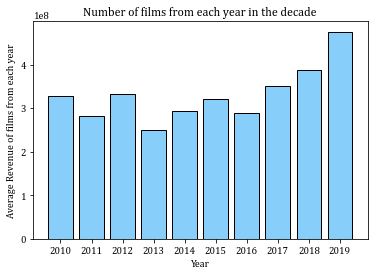

In [8]:
average_revenue_per_year = dataset[['year', 'revenue']].groupby('year').mean()
years = labels = np.array(average_revenue_per_year.index.tolist())
average_by_year = [val[0] for val in average_revenue_per_year.values.tolist()]
plt.bar(labels, average_by_year, align='center', color="lightskyblue", edgecolor="black")
plt.xticks(labels, years)
plt.xlabel("Year")
plt.ylabel("Average Revenue of films from each year")
plt.title("Number of films from each year in the decade")
plt.savefig("../figures/film-revenue-per-year.jpg", dpi=200)

### Release month

In [9]:
release_dates = pd.read_csv("../dbs/release_dates_2010s.csv")
dataset = release_dates.merge(dataset, on='tmdb_id')
dataset.shape

(650, 35)

In [13]:
dataset['weekday_released'] = pd.Categorical(dataset['weekday_released'], ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
average_revenue_per_weekday = dataset[['weekday_released', 'revenue']].groupby('weekday_released').mean().reset_index()
total_videos_per_weekday = dataset['weekday_released'].value_counts().sort_index().values

In [14]:
average_revenue_per_weekday.sort_values('weekday_released').values

array([['Sunday', 318798371.8],
       ['Monday', 112044105.5],
       ['Tuesday', 393853668.25],
       ['Wednesday', 331966768.71428573],
       ['Thursday', 281300527.2307692],
       ['Friday', 321112156.5826923],
       ['Saturday', 154782378.8]], dtype=object)

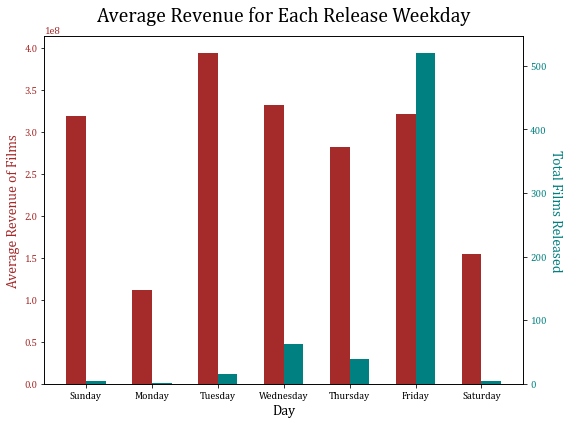

In [45]:
days = average_revenue_per_weekday.sort_values('weekday_released').values[:, 0]
labels = np.arange(0, len(days))
average_by_weekday = average_revenue_per_weekday.sort_values('weekday_released').values[:, 1]
fig, ax1 = plt.subplots(figsize=(8, 6))
ax1.set_title("Average Revenue for Each Release Weekday", fontsize=20, pad=15)
ax1.set_xlabel("Day", fontsize=14)
ax1.set_xticks(labels)
ax1.set_xticklabels(days)
ax1.set_ylabel("Average Revenue of Films", fontsize=14, color="brown")
ax1.bar(labels-0.3, average_by_weekday, width=0.3, align='edge', color="brown")
ax1.tick_params(axis='y', labelcolor="brown")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel("Total Films Released", fontsize=14, color="teal", rotation=270, labelpad=15)  # we already handled the x-label with ax1
ax2.bar(labels, total_videos_per_weekday, width=0.3, align='edge', color="teal")
ax2.tick_params(axis='y', labelcolor="teal")

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("../figures/revenue-per-weekday.jpg", dpi=200)